In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Problem 1 Jacobi and Gauss-Seidel Method

In [2]:
# Set the domain and grid
L = 2 * np.pi
N = 20
dx = L / N 
dy = L / N
x = np.arange(0, L+dx, dx)
y = np.arange(0, L+dy, dy)
u = np.zeros((N+1, N+1))

# boundary condition
u[:, 0] = np.sin(x) + np.sin(2*x) + np.sin(5*x) + np.sin(7*x)
u[:, -1] = 0 
u[0, :] = 0
u[-1, :] = 0

residual_jacobi, residual_gs = [], []

# Calculate the residual 
def residual(u, dx, dy):
    diff_x = (u[2:, 1:-1] + u[:-2, 1:-1] - 2*u[1:-1, 1:-1]) / dx**2
    diff_y = (u[1:-1, 2:] + u[1:-1, :-2] - 2*u[1:-1, 1:-1]) / dy**2
    return diff_x + diff_y
    
# Jacobi Method
def jacobi(u, max_iter=10000, tol=1e-6):
    u_new = u.copy()
    for it in range(max_iter):
        u_old = u_new.copy()
        for i in range(1, N):
            for j in range(1, N):
                u_new[i, j] = 0.25 * (u_old[i+1, j] + u_old[i-1, j] + u_old[i, j+1] + u_old[i, j-1])

        residual_jacobi.append(np.linalg.norm(residual(u_new, dx, dy)))
        if residual_jacobi[-1] < tol:
            print(f'Jacobi method converged in {it} iterations with residual {residual_jacobi[-1]}')
            break
    return u_new

# Gauss-Seidel Method
def gauss_seidel(u, max_iter=10000, tol=1e-6):
    for it in range(max_iter):
        u_old = u.copy()
        for i in range(1, N):
            for j in range(1, N):
                u[i, j] = 0.25 * (u_old[i+1, j] + u[i-1, j] + u_old[i, j+1] + u[i, j-1])
        residual_gs.append(np.linalg.norm(residual(u, dx, dy)))
        if residual_gs[-1] < tol:
            print(f'Gauss-Seidel method converged in {it} iterations with residual {residual_gs[-1]}')
            break
    return u

# # 计算数值解
u_jacobi = jacobi(u.copy())
u_gauss_seidel = gauss_seidel(u.copy())

Jacobi method converged in 458 iterations with residual 9.982677984095897e-07
Gauss-Seidel method converged in 450 iterations with residual 9.866439568705241e-07


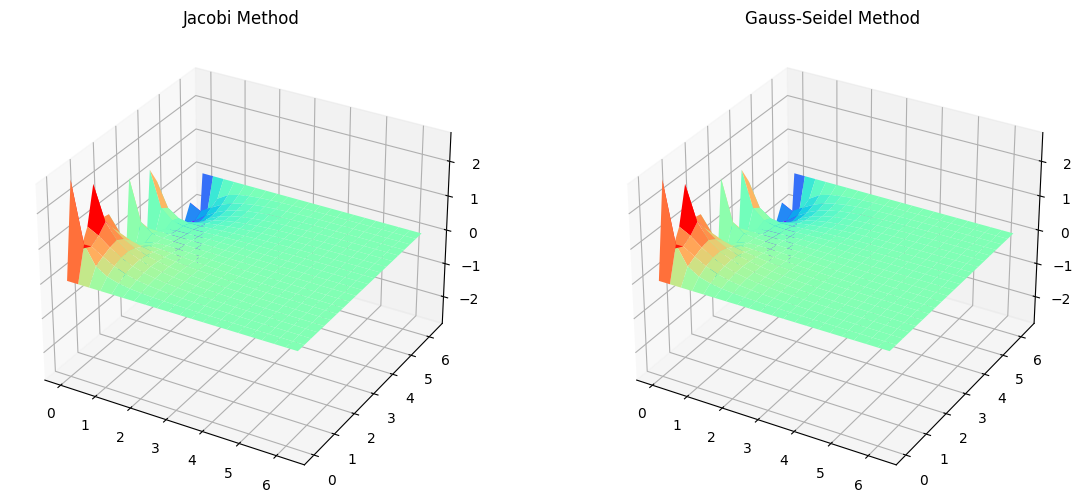

In [3]:
# Visualize the results
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, u_jacobi, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))
ax.title.set_text('Jacobi Method')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, u_gauss_seidel, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))
ax2.title.set_text('Gauss-Seidel Method')

plt.show()

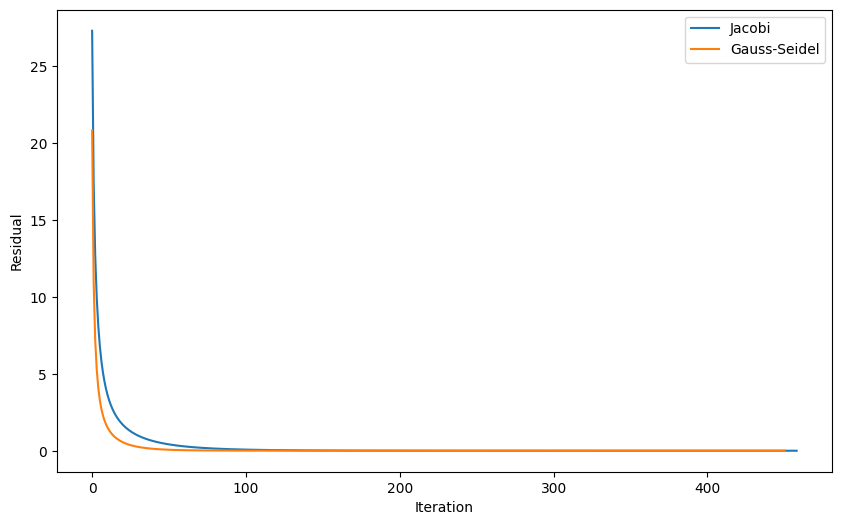

In [4]:
# Visualize the residual
plt.figure(figsize=(10, 6))
plt.plot(residual_jacobi, label='Jacobi')
plt.plot(residual_gs, label='Gauss-Seidel')
#plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.legend()
plt.show()



# Problem 2 Successive Over Relaxiation

In [5]:
# Define the omega
omega = [0.25, 0.5, 0.75, 1]

# Define the SOR method
def SOR(u, max_iter, omega, type, tol=1e-6):
    residual_ = []
    u_new = u.copy()
    for it in range(max_iter):
        u_old = u_new.copy()
        for i in range(1, N):
            for j in range(1, N):
                if type == 'Jacobi':
                    u_tilde = 0.25 * (u_old[i+1, j] + u_old[i-1, j] + u_old[i, j+1] + u_old[i, j-1])
                elif type == 'Gauss-Seidel':
                    u_tilde = 0.25 * (u_old[i+1, j] + u_new[i-1, j] + u_old[i, j+1] + u_new[i, j-1])
                    
                u_new[i, j] = (1 - omega) * u_old[i, j] + omega * u_tilde
        residual_.append(np.linalg.norm(residual(u_new, dx, dy)))
        if residual_[-1] < tol:
            print(f'G-S with {type} point, omega={omega} converged in {it} iterations with residual {residual_[-1]}')
            break
    return u_new, residual_

G-S with Jacobi point, omega=0.25 converged in 1857 iterations with residual 9.94864124908982e-07
G-S with Jacobi point, omega=0.5 converged in 925 iterations with residual 9.859366510438122e-07
G-S with Jacobi point, omega=0.75 converged in 614 iterations with residual 9.8447596437816e-07
G-S with Jacobi point, omega=1 converged in 458 iterations with residual 9.982677984095897e-07
G-S with Gauss-Seidel point, omega=0.25 converged in 2638 iterations with residual 9.975419007869787e-07
G-S with Gauss-Seidel point, omega=0.5 converged in 1230 iterations with residual 9.998345210289189e-07
G-S with Gauss-Seidel point, omega=0.75 converged in 721 iterations with residual 9.854942116825796e-07
G-S with Gauss-Seidel point, omega=1 converged in 450 iterations with residual 9.866439568705241e-07


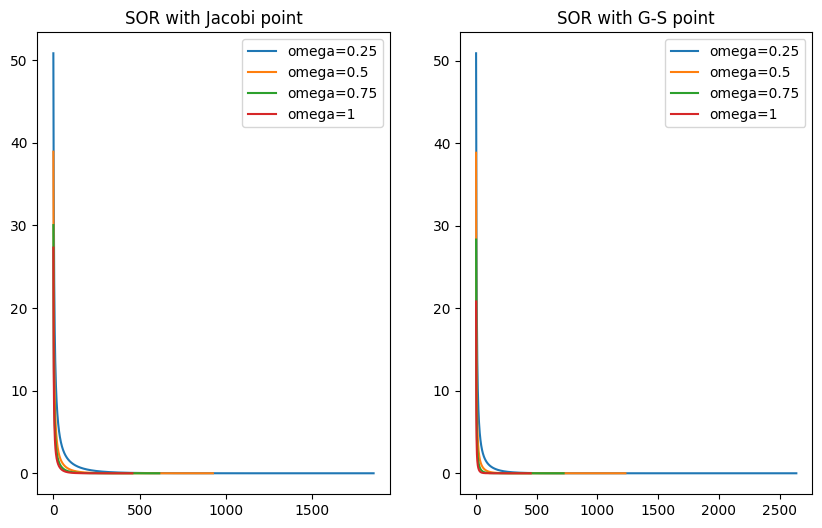

In [6]:
# SOR with the Jacobi
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
for order in omega:
    u_sor, residual_sor = SOR(u.copy(), 10000, order, 'Jacobi')
    plt.plot(residual_sor, label=f'omega={order}')
plt.title('SOR with Jacobi point')
plt.legend()  

plt.subplot(1, 2, 2)
for order in omega:
    u_sor, residual_sor = SOR(u.copy(), 10000, order, 'Gauss-Seidel')
    plt.plot(residual_sor, label=f'omega={order}')
plt.title('SOR with G-S point')
plt.legend() 

plt.show() 

/tmp/ipykernel_2562001/649194960.py:22: RuntimeWarning: overflow encountered in add
  return diff_x + diff_y
/tmp/ipykernel_2562001/649194960.py:20: RuntimeWarning: overflow encountered in divide
  diff_x = (u[2:, 1:-1] + u[:-2, 1:-1] - 2*u[1:-1, 1:-1]) / dx**2
/tmp/ipykernel_2562001/649194960.py:21: RuntimeWarning: overflow encountered in divide
  diff_y = (u[1:-1, 2:] + u[1:-1, :-2] - 2*u[1:-1, 1:-1]) / dy**2
/tmp/ipykernel_2562001/649194960.py:20: RuntimeWarning: overflow encountered in subtract
  diff_x = (u[2:, 1:-1] + u[:-2, 1:-1] - 2*u[1:-1, 1:-1]) / dx**2
/tmp/ipykernel_2562001/649194960.py:21: RuntimeWarning: overflow encountered in subtract
  diff_y = (u[1:-1, 2:] + u[1:-1, :-2] - 2*u[1:-1, 1:-1]) / dy**2
/tmp/ipykernel_2562001/1166984604.py:13: RuntimeWarning: overflow encountered in double_scalars
  u_tilde = 0.25 * (u_old[i+1, j] + u_old[i-1, j] + u_old[i, j+1] + u_old[i, j-1])


G-S with Gauss-Seidel point, omega=1.25 converged in 278 iterations with residual 9.965978365333827e-07
G-S with Gauss-Seidel point, omega=1.5 converged in 156 iterations with residual 9.555060973474887e-07


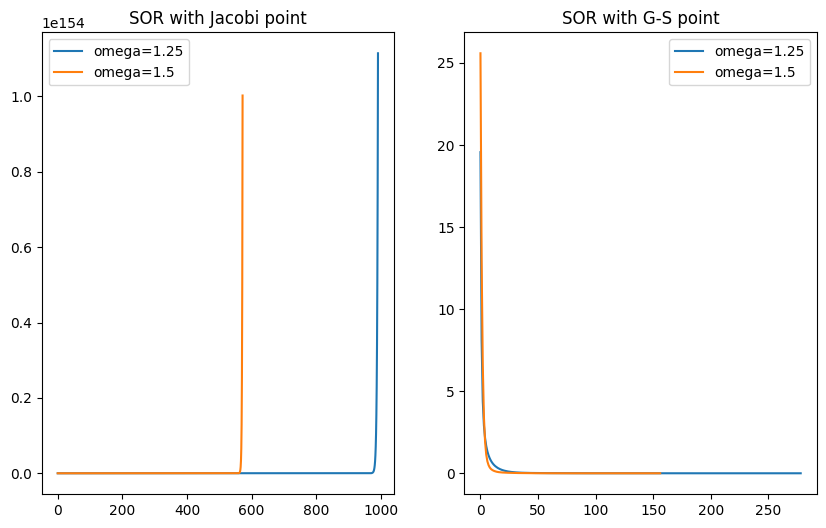

In [7]:
# The situation which omega is greater than 1
omega_1 = [1.25, 1.5]
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
for order in omega_1:  
    u_sor, residual_sor = SOR(u.copy(), 10000, order, 'Jacobi')  
    plt.plot(residual_sor, label=f'omega={order}')
plt.title('SOR with Jacobi point')
plt.legend()  

plt.subplot(1, 2, 2)
for order in omega_1: 
    u_sor, residual_sor = SOR(u.copy(), 10000, order, 'Gauss-Seidel')  
    plt.plot(residual_sor, label=f'omega={order}')
plt.title('SOR with G-S point')
plt.legend()

plt.show() 

## As we can see that, when $\omega$ is greater than 1, the SOR with Jacobi point can't converge but the SOR with G-S can do it. The optimal $\omega$ for SOR-Jacobi is around and smaller than 1, but the optimum for SOR-G-S is around 1.5, because it converged in 156 iterations which is the fastest in the above settings.